In [ ]:
# Understading the Chain Rule

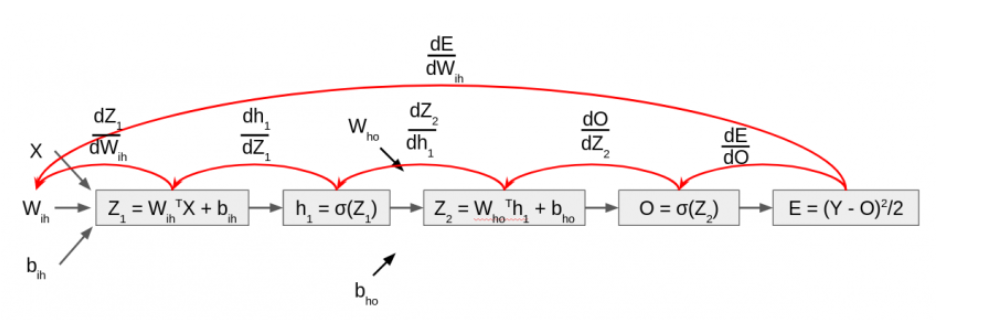

In [ ]:
'''
So by chain rule, we will calculate the following intermediate steps,

Rate of change of error w.r.t output
Rate of change of output w.r.t Z2
Rate of change of Z2 w.r.t hidden layer activations
Rate of change of hidden layer activations w.r.t Z1
Rate of change of Z1 w.r.t weights between input and hidden layer

# rate of change of error w.r.t. output
∂E/∂O = -(y - output)

# rate of change of output w.r.t. Z2
∂O/∂Z2 =  np.multiply(output, (1 - output))

# rate of change of Z2 w.r.t. hidden layer activations
∂Z2/∂h1 = weights_hidden_output

# rate of change of hidden layer activations w.r.t. Z1
∂h1/∂Z1 =  np.multiply(hiddenLayer_activations, (1 - hiddenLayer_activations))

# rate of change of Z1 w.r.t. weights between input and hidden layer
∂Z1/∂Wih = X

'''

In [1]:
import numpy as np

In [2]:
# creating the input array
X = np.array([[1, 0, 0, 0], [1, 0, 1, 1], [0, 1, 0, 1]])

print("Input:\n", X)

# shape of input array
print("\nShape of Input:", X.shape)

Input:
 [[1 0 0 0]
 [1 0 1 1]
 [0 1 0 1]]

Shape of Input: (3, 4)


In [3]:
# converting the input in matrix form
X = X.T
print("Input in matrix form:\n", X)

# shape of input matrix
print("\nShape of Input Matrix:", X.shape)

Input in matrix form:
 [[1 1 0]
 [0 0 1]
 [0 1 0]
 [0 1 1]]

Shape of Input Matrix: (4, 3)


In [4]:
# creating the output array
y = np.array([[1], [1], [0]])

In [5]:
print("Actual Output:\n", y)

# output in matrix form
y = y.T

Actual Output:
 [[1]
 [1]
 [0]]


In [6]:
inputLayer_neurons = X.shape[0]  # number of features in data set
hiddenLayer_neurons = 3  # number of hidden layers neurons
outputLayer_neurons = 1  # number of neurons at output layer

In [7]:
weights_input_hidden = np.random.uniform(size=(inputLayer_neurons, hiddenLayer_neurons))

In [8]:
weights_input_hidden # (4*3) (4 input and 3 hidden Neurons)

array([[0.994919  , 0.767105  , 0.25811471],
       [0.87843366, 0.49158959, 0.45782024],
       [0.73524207, 0.91628202, 0.62573883],
       [0.8162067 , 0.55249248, 0.89897088]])

In [10]:
weights_hidden_output = np.random.uniform(size=(hiddenLayer_neurons, outputLayer_neurons))

In [12]:
weights_hidden_output # (3*1) (3 hidden neurons and 1 output )

array([[0.67457685],
       [0.12215086],
       [0.5797515 ]])

In [13]:
# We are using sigmoid as an activation function so defining the sigmoid function here

# defining the Sigmoid Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [15]:
hiddenLayer_linearTransform = np.dot(weights_input_hidden.T, X)
hiddenLayer_activations = sigmoid(hiddenLayer_linearTransform)

In [17]:
# calculating the output
outputLayer_linearTransform = np.dot(weights_hidden_output.T, hiddenLayer_activations)
output = sigmoid(outputLayer_linearTransform)

In [18]:
output

array([[0.71156082, 0.77420383, 0.7542284 ]])

In [19]:
error = np.square(y - output) / 2
error

array([[0.04159858, 0.02549196, 0.28443024]])

In [22]:
# rate of change of error w.r.t. output
error_wrt_output = -(y - output)

error_wrt_output

array([[-0.28843918, -0.22579617,  0.7542284 ]])

In [24]:
# rate of change of output w.r.t. Z2
output_wrt_outputLayer_LinearTransform = np.multiply(output, (1 - output))

output_wrt_outputLayer_LinearTransform

array([[0.20524202, 0.17481226, 0.18536792]])

In [26]:
# rate of change of Z2 w.r.t. weights between hidden and output layer
outputLayer_LinearTransform_wrt_weights_hidden_output = hiddenLayer_activations

outputLayer_LinearTransform_wrt_weights_hidden_output

array([[0.73005842, 0.92732912, 0.84483344],
       [0.68289431, 0.90342555, 0.73963688],
       [0.56417279, 0.85604528, 0.79523768]])

In [30]:
# rate of change of error w.r.t weight between hidden and output layer
error_wrt_weights_hidden_output = np.dot(outputLayer_LinearTransform_wrt_weights_hidden_output,
                                         (error_wrt_output * output_wrt_outputLayer_LinearTransform).T)

In [31]:
error_wrt_weights_hidden_output

array([[0.03829313],
       [0.02732126],
       [0.04399328]])